![](https://raw.githubusercontent.com/unm-escape/escape2022/main/header2.png)

<h1 style="text-align:center; color:#3333ff;">Intro to ObsPy Lab</h1>
<br>
<div style="text-align:center; font-size:16px">
    Earth and Planetary Sciences,<br>
    University of New Mexico<br>
    <br>
    August 15, 2022
</div>

---
**Dependencies:** Obspy, Matplotlib, Numpy

---

Import all required packages.

In [1]:
import os
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import UTCDateTime
from obspy import read
from obspy import read_inventory
from obspy import read_events

from obspy.clients.fdsn import Client as FDSN_Client
from obspy import UTCDateTime
from obspy.taup import TauPyModel
from obspy.geodetics import gps2dist_azimuth
from obspy.geodetics import kilometer2degrees

## 1. Download station(s) inventory of your choosing

Specify the FDSN client.

In [2]:
client = FDSN_Client(" ")

How do we decide which stations to download?

Generally, seismologist uses the [SEED](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/) format which has 4 components for data identification:
1) Network code
2) Station code
3) Location ID
4) Channel codes

We can check global seismic station distribution and get the identification information from the IRIS [GMAP](https://ds.iris.edu/gmap/) tool which creates dynamic station maps that can be panned and zoomed. In this example, I retrieved network code, station code, channel codes and the location ID from the GMAP tool. The starttime and endtime depend on when the events occured.

In [4]:
network = 
station = 
channel = 
location = 
starttime = 
endtime = 

Now let's query the station service of the FDSN client using the [get_stations](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html) function which returns a stations inventory object.

In [5]:
inventory = client.get_stations(network=network, station=station, channel=channel, 
                                level='response', location=location, starttime=UTCDateTime(starttime), 
                                endtime=UTCDateTime(endtime))

In [6]:
print(inventory)

Inventory created at 2022-08-14T18:54:56.729000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2021-07-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (1):
			II.KDAK (Kodiak Island, Alaska, USA)
		Channels (3):
			II.KDAK.00.BHZ, II.KDAK.00.BH1, II.KDAK.00.BH2


In [64]:
print(inventory[0])
print(inventory[0].code)
print(inventory[0].stations)
print(inventory[0][0])
print(inventory[0][0].code) # For station name
print(inventory[0][0][0])

Network II (Global Seismograph Network - IRIS/IDA (GSN))
	Station Count: 1/58 (Selected/Total)
	1986-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (1):
			II.KDAK (Kodiak Island, Alaska, USA)
		Channels (3):
			II.KDAK.00.BHZ, II.KDAK.00.BH1, II.KDAK.00.BH2
II
Station KDAK (Kodiak Island, Alaska, USA)
	Station Code: KDAK
	Channel Count: 3/245 (Selected/Total)
	1997-06-09T00:00:00.000000Z - 
	Access: open 
	Latitude: 57.78, Longitude: -152.58, Elevation: 152.0 m
	Available Channels:
		KDAK.00.BHZ, KDAK.00.BH1, KDAK.00.BH2
KDAK
Channel 'BH1', Location '00' 
	Time range: 2021-03-20T00:00:00.000000Z - 2022-03-14T10:19:59.000000Z
	Latitude: 57.78, Longitude: -152.58, Elevation: 152.0 m, Local Depth: 88.0 m
	Azimuth: 155.20 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 40.00 Hz
	Sensor (Description): None (Nanometrics Trillium 360 Seismometer - Borehole)
	Response information available


---
We can view the stations on a map global or local map using the [inventory.plot()](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.plot.html) function. See the documentation for more parameters.

NOTE: Plotting higher resolution maps i.e. resolution='f' will take longer to plot.

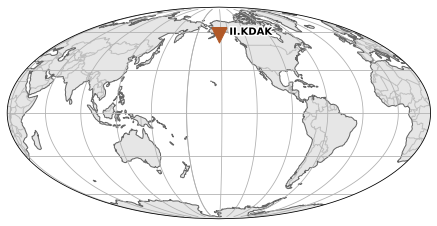

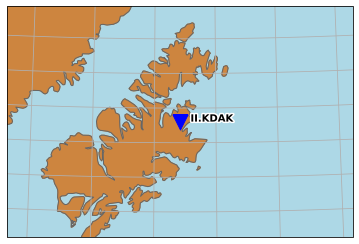

In [7]:
inventory.plot('global');
#inventory.plot('ortho');
inventory.plot(projection='local', resolution='f', color='blue', continent_fill_color='peru', water_fill_color='lightblue');

Now we create a new directory, name it appropriately and save the station inventory xml file inside it.

First we import python's [os](https://docs.python.org/3/library/os.html) module which provides a portable of interfacing with the computer's operation system.

In [8]:
import os

Use the os.path.join() method to establish a path to the directory we want to create.

In [9]:
data_dir = os.path.join('lab_data', '')
print(data_dir)

data/


---
Use the os.mkdir() method to create a directory joined by the path

In [10]:
os.mkdir(data_dir)

Now save the station inventory inside the newly created directory using ObsPy's [inventory.write()](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.write.html) function.

In [11]:
inventory.write(data_dir + 'station.xml', 'STATIONXML')

---
To read station inventory from an xml file in your computer, import ObsPy's [inventory.read()](https://docs.obspy.org/packages/autogen/obspy.core.inventory.inventory.read_inventory.html) function.

In [12]:
from obspy import read_inventory

Read the inventory into a new inventory variable.

In [13]:
inventory2 = read_inventory(data_dir + 'station.xml')

In [14]:
print(inventory2)

Inventory created at 2022-08-14T18:54:56.729000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2021-07-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			II
		Stations (1):
			II.KDAK (Kodiak Island, Alaska, USA)
		Channels (3):
			II.KDAK.00.BHZ, II.KDAK.00.BH1, II.KDAK.00.BH2


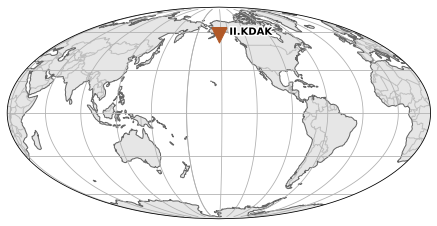

In [15]:
inventory2.plot();

## 2. Download earthquake catalog

Search for earthquakes(s) occuring within the deployment window of your stations. Feel free to use the [Earthquake browser](https://earthquake.usgs.gov/earthquakes/map/?extent=20.75611,-128.67188&extent=52.61639,-61.30371) or google an interesting event occuring within the deployment window.

Query the events service of the FDSN client using the [get_events](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html) function which returns an events catalog object.

In [ ]:
client = FDSN_Client("IRIS")

In [3]:
catalog = 

In [19]:
print(catalog)

1 Event(s) in Catalog:
2021-07-29T06:15:49.188000Z | +55.364, -157.888 | 8.2  Mww


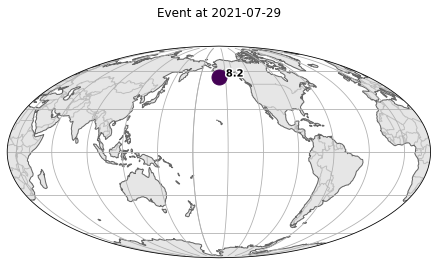

In [20]:
catalog.plot();

Write event to file

In [21]:
catalog.write(data_dir + 'event.xml', 'QUAKEML')

To read event(s) from file, import ObsPy's [read_events()](https://docs.obspy.org/master/packages/autogen/obspy.core.event.read_events.html) function.

In [22]:
from obspy import read_events

In [23]:
catalog2 = read_events(data_dir + 'event.xml')

In [24]:
print(catalog2)

1 Event(s) in Catalog:
2021-07-29T06:15:49.188000Z | +55.364, -157.888 | 8.2  Mww


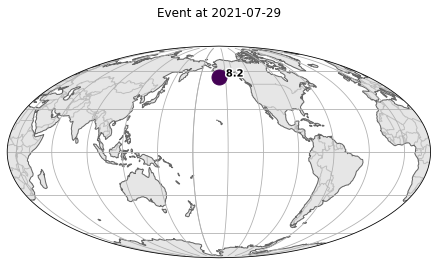

In [25]:
catalog2.plot();

In [26]:
print(catalog2[0])

Event:	2021-07-29T06:15:49.188000Z | +55.364, -157.888 | 8.2  Mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=11448043")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=45580736")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=207383218")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


---
Explore earthquake parameters from the catalog:

In [27]:
event = catalog2[0]
eq_time = event.origins[0].time
eq_mag = event.magnitudes[0].mag
eq_lat = event.origins[0].latitude
eq_lon = event.origins[0].longitude
eq_depth = event.origins[0].depth/1000
eq_description = event.event_descriptions[0].text
eq_mag_type = event.magnitudes[0].magnitude_type

In [28]:
print(eq_time)

2021-07-29T06:15:49.188000Z


## 3. Downloading earthquake seismograms

Define the FDSN client and taup earth model

In [31]:
client = FDSN_Client("IRIS")
tpmodel = TauPyModel(model='iasp91')

Get the station latitude and longitude from the station inventory we downloaded earlier.

In [32]:
sta_lat = inventory[0].stations[0].latitude
sta_lon = inventory[0].stations[0].longitude

Retrieve the earthquakes P-wave travel time information.

In [45]:
epi_dist_m, az, baz = gps2dist_azimuth(eq_lat, eq_lon, sta_lat, sta_lon)
epi_dist_km = epi_dist_m/1000
epi_dist_deg = kilometer2degrees(epi_dist_km)
arrivals = tpmodel.get_travel_times(distance_in_degree=epi_dist_deg, source_depth_in_km=eq_depth, phase_list=['P'])
print(arrivals[0])

P phase arrival at 56.038 seconds


---
Let's see if we have all the information we need to download the seismograms.

In [34]:
ttime = arrivals[0].time
print(ttime)

56.03844927708492


In [35]:
print(eq_time)

2021-07-29T06:15:49.188000Z


In [36]:
#originTime = UTCDateTime('2021-07-29T06:15:49')
#print(originTime)

In [37]:
onset = eq_time + ttime
print(onset)

2021-07-29T06:16:45.226449Z


In [38]:
tstart = onset - 60*3
print(tstart)

2021-07-29T06:13:45.226449Z


In [39]:
tend = onset + 60*15
print(tend)

2021-07-29T06:31:45.226449Z


In [40]:
network = 'II'#inventory[0].code
station = 'KDAK'#inventory[0].stations[0].code
location = '00'#'*'
channel = 'BH?'

---
Query the dataselect service of the FDSN client using the [get_waveforms](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html) function which returns a [Stream](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html#obspy.core.stream.Stream) object.

ObsPy stores seismograms in [Stream](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html#obspy.core.stream.Stream) object which are list-like objects that contain several [Trace](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html#obspy.core.trace.Trace) objects (i.e. time series with accompanying header/metadata).

The data attribute in Trace objects contains the actual time series data which is a [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray) array. The metadata is stored in [stats]() attribute of the Trace objects.

In [46]:
stream = client.get_waveforms(network, station, location, channel, tstart, tend)
print(stream)

3 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples
II.KDAK.00.BH2 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples
II.KDAK.00.BHZ | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


In [49]:
len(stream)

3

Assign the first trace to a variable

In [50]:
print(stream[0])

II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


In [51]:
tr = stream[0].copy()
print(tr)

II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


Access meta data using the stats keyword.

In [52]:
print(tr.stats)

               network: II
               station: KDAK
              location: 00
               channel: BH1
             starttime: 2021-07-29T06:13:45.244539Z
               endtime: 2021-07-29T06:31:45.219539Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 43200
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 31, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 376832})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2021, 7, 29, 6, 31, 45, 219539)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2021, 7, 29, 6, 13, 45, 219539))']


In [56]:
print(tr.stats.station)

KDAK


In [55]:
print(tr.stats.mseed.record_length)

4096


Access waveform data using the data keyword.

In [60]:
len(tr)

43200

In [61]:
tr.data

array([   138,    121,    123, ..., 696156, 680766, 665249], dtype=int32)

In [62]:
tr.data[0:3]

array([138, 121, 123], dtype=int32)

Use the [plot](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.plot.html#obspy.core.stream.Stream.plot) method to plot the waveform.

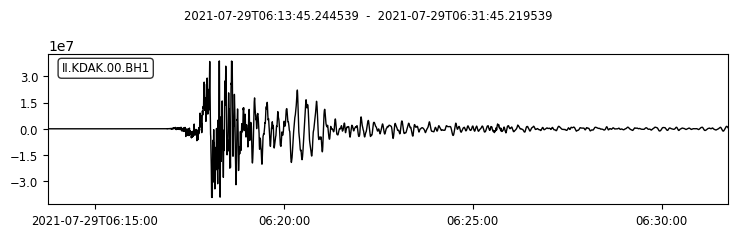

In [63]:
tr.plot();

In [67]:
print(inventory.get_orientation("II.KDAK.00.BHZ", eq_time))
print(inventory.get_response("II.KDAK.00.BHZ", eq_time))
print(inventory.get_coordinates("II.KDAK.00.BHZ", eq_time))
print(inventory.get_channel_metadata("II.KDAK.00.BHZ", eq_time))

{'azimuth': 0.0, 'dip': -90.0}
Channel Response
	From m/s (Velocity in Meters Per Second) to counts (Digital Counts)
	Overall Sensitivity: 1.82373e+09 defined at 0.050 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from m/s to V, gain: 1090.83
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to counts, gain: 1.67184e+06
		Stage 4: CoefficientsTypeResponseStage from counts to counts, gain: 1
{'latitude': 57.7828, 'longitude': -152.5835, 'elevation': 152.0, 'local_depth': 88.0}
{'latitude': 57.7828, 'longitude': -152.5835, 'elevation': 152.0, 'local_depth': 88.0, 'azimuth': 0.0, 'dip': -90.0}


---
## 4. Removing instrument response

The digitizer in modern seismometers converts the analog voltage signal to a digital timeseries. So the seismogram we downloaded is not actually a record ground motion but counts (see the cell above). To convert the data to actual ground motion, we have to remove the instrument response.

ObsPy allows users to attach the instrument response from clients when waveforms are downloaded.

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


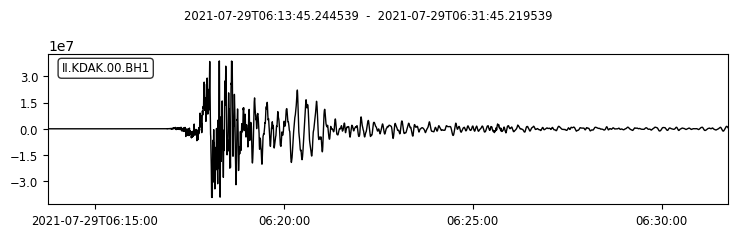

In [68]:
channel = 'BH1'
stream = client.get_waveforms(network, station, location, channel, tstart, tend, attach_response=True)
print(stream)
stream.plot();

In [69]:
inst_removed = stream.copy()
print(inst_removed)

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


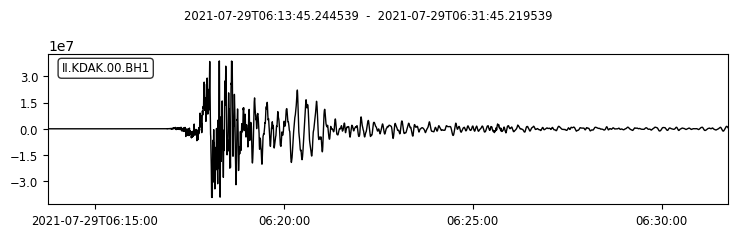

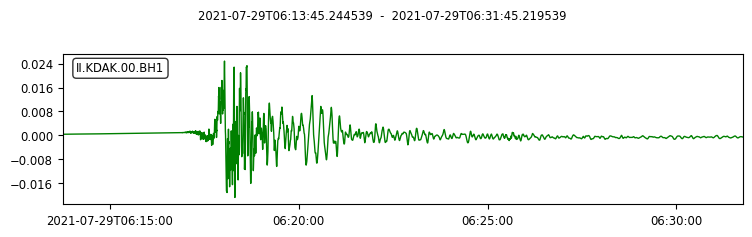

In [70]:
inst_removed[0].remove_response(output='VEL')

stream[0].plot();
inst_removed[0].plot(color='green');

We can view the instrument removal process making the plot parameter True.

Let's repeat the instrument removal. We have to re-copy the data since the instrument response was already removed.

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples

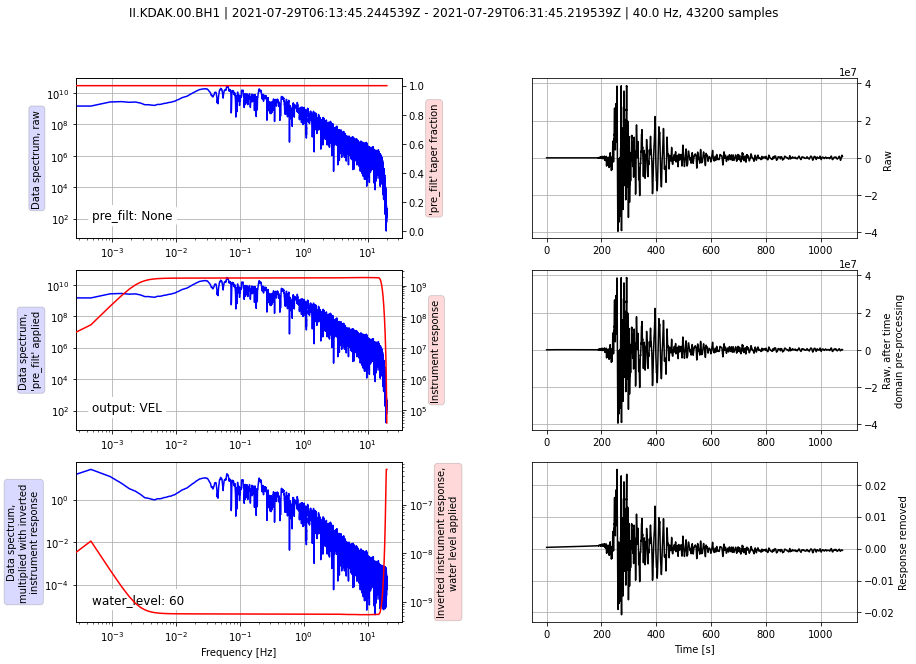

In [71]:
inst_removed = stream.copy()
inst_removed.remove_response(output='VEL', plot=True)

## 5. Writing waveform data to disk

In [72]:
JDay = str(eq_time.julday)
YYYY = str(eq_time.year)
MM = str((format(eq_time.month,'02d')))
DD = str((format(eq_time.day,'02d')))
HH = str((format(eq_time.hour,'02d')))
mm = str((format(eq_time.minute,'02d')))
ss = str((format(eq_time.second,'02d')))
msec = str(eq_time.microsecond)[:6]

In [74]:
location = inst_removed[0].stats.location
quality = inst_removed[0].stats.mseed.get('dataquality')
fileID = network+'.'+station+'.'+location+'.'+channel+'.'+ quality+'.'+YYYY+'.'+JDay+'.'+HH+mm+ss+'.SAC'
print(fileID)

II.KDAK.00.BH1.M.2021.210.061549.SAC


In [75]:
inst_removed[0].write(data_dir + fileID, format='SAC')

## 6. Reading waveform data from disk

ObsPy can detect seismogram data of various formats (e.g. SAC, MiniSEED, GSE2, SEISAN, Q, etc.) and import them into a Stream object using the [read()](https://docs.obspy.org/packages/autogen/obspy.core.stream.read.html) function.

In [77]:
print(data_dir+fileID)

data/II.KDAK.00.BH1.M.2021.210.061549.SAC


In [78]:
st = read(data_dir + fileID)
print(st)

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.219539Z | 40.0 Hz, 43200 samples


In [106]:
print(st[0].stats) # Notice the file format has changed from mseed to sac.

         network: II
         station: KDAK
        location: 00
         channel: BH1
       starttime: 2021-07-29T06:13:45.244539Z
         endtime: 2021-07-29T06:31:45.219539Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 43200
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -0.020705583, 'depmax': 0.024814973, 'scale': 1.0, 'b': 0.000539, 'e': 1079.9756, 'depmen': 8.859182e-05, 'nzyear': 2021, 'nzjday': 210, 'nzhour': 6, 'nzmin': 13, 'nzsec': 45, 'nzmsec': 244, 'nvhdr': 6, 'npts': 43200, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'KDAK', 'khole': '00', 'kcmpnm': 'BH1', 'knetwk': 'II'})


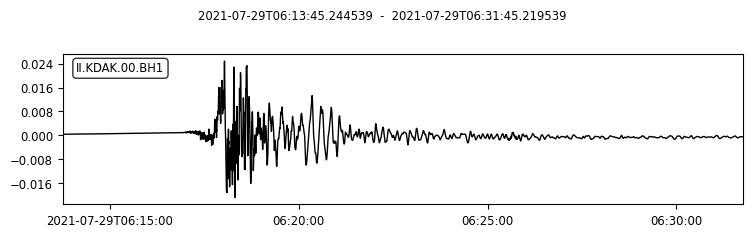

In [107]:
st[0].plot();

## 7. Miscellaneous

---
### Trimming

In [145]:
tstart2 = onset - 20
tend2 = onset + 3*60

In [146]:
st_trimmed = st.copy()
st_trimmed.trim(starttime=tstart2, endtime=tend2)

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:16:25.219539Z - 2021-07-29T06:19:45.219539Z | 40.0 Hz, 8001 samples

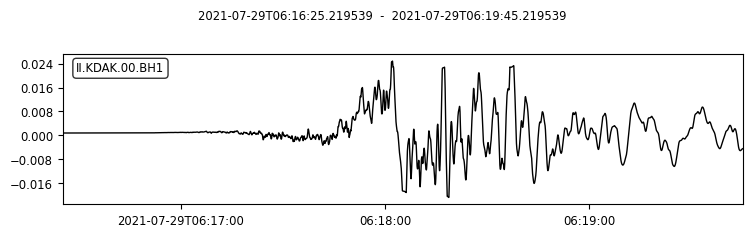

In [147]:
st_trimmed.plot();

---
### Spectrogram

A spectrogram is a visual way of representing the strength of a signal over time at different frequencies.

ObsPy's [spectrogram](https://docs.obspy.org/packages/autogen/obspy.imaging.spectrogram.spectrogram.html) function computes and plots spectrograms of input waveforms.

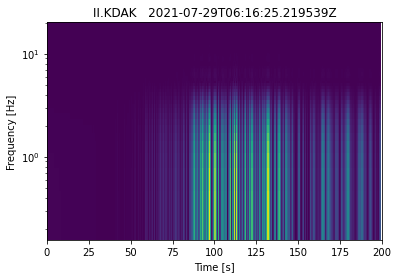

[None]

In [172]:
st_trimmed.spectrogram(log=True, title='II.KDAK   ' + str(st_trimmed[0].stats.starttime))

---
### Resampling

ObsPy provides several methods for changing the sampling rate of waveform data. In this example, we will use the [interpolate](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.interpolate.html#obspy.core.stream.Stream.interpolate) function.

Since this operation alters the actual data arrays, keep the original data using the copy function to create a copy of your stream object.

Print original sampling rate

In [173]:
st_resamp = st.copy()
print(st_resamp[0].stats.sampling_rate)

40.0


Now let's resample to 10 Hz.

In [174]:
st_resamp.interpolate(10)

1 Trace(s) in Stream:
II.KDAK.00.BH1 | 2021-07-29T06:13:45.244539Z - 2021-07-29T06:31:45.144539Z | 10.0 Hz, 10800 samples

Print the new sampling rate

In [175]:
print(st_resamp[0].stats.sampling_rate)

10.0


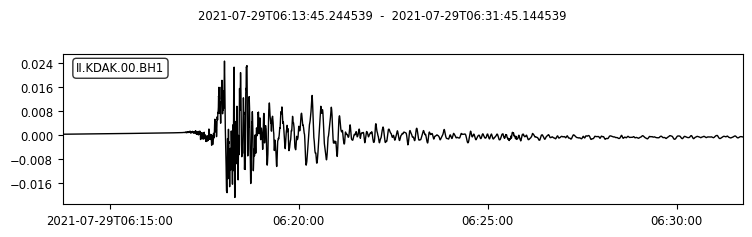

In [176]:
st_resamp.plot();

---
### Filtering

Available filters in ObsPy include:
1) bandpass
2) bandstop
3) lowpass
4) highpass
    
In this example we will apply a bandpass filter to the resampled chignik seismogram.

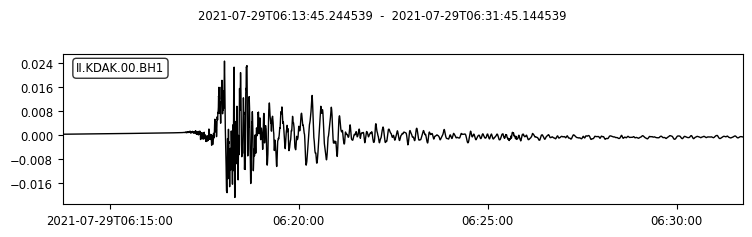

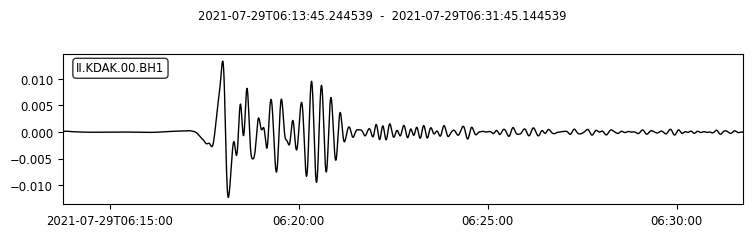

In [181]:
st_filt = st_resamp.copy()
st_filt.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
st_resamp.plot();
st_filt.plot();

<h1 style="text-align:center; color:#3333ff;">That's all folks!</h1>